In [8]:
#import arrow
import cmocean.cm as cm
#import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
#import netCDF4 as nc
#import numpy as np
#import os
import pandas as pd
#import statsmodels.formula.api as smf
#import pickle
import xarray as xr

%matplotlib inline

In [9]:
plt.rcParams['font.size'] = 14

In [10]:
Vic_to_PR_2015 = pd.read_csv('Vic_to_PR_2015_v3.csv', index_col=0)
Vic_to_GI_2015 = pd.read_csv('Vic_to_GI_2015_v3.csv', index_col=0)

In [11]:
Vic_to_SoG_2015 = Vic_to_PR_2015.copy()
for key in Vic_to_PR_2015.keys():
    if key == 'transport':
        Vic_to_SoG_2015.transport = Vic_to_PR_2015.transport + Vic_to_GI_2015.transport
    else:
        Vic_to_SoG_2015[key] = ((Vic_to_PR_2015[key] * Vic_to_PR_2015.transport 
                                + Vic_to_GI_2015[key] * Vic_to_GI_2015.transport) /
                            (Vic_to_PR_2015.transport + Vic_to_GI_2015.transport))

In [12]:
Vic_to_SoG_2015['yearday'] = Vic_to_SoG_2015.reset_index().index

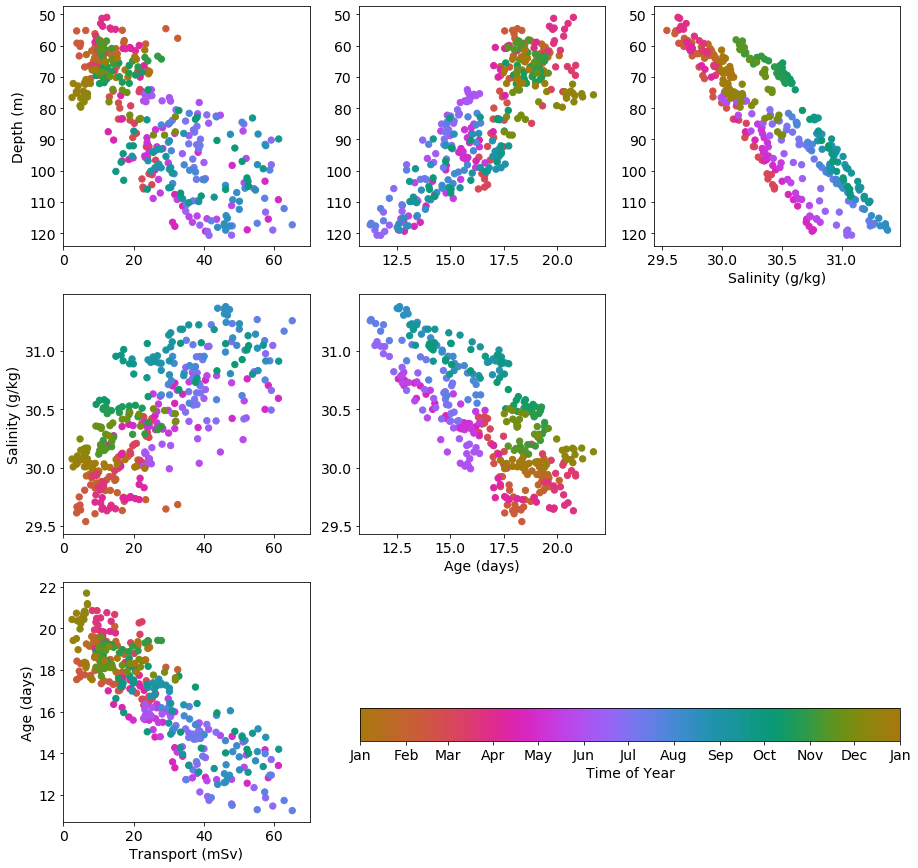

In [15]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))

colour = Vic_to_SoG_2015.yearday
cmap = cm.phase
sz = 40

ax[0,0].scatter(Vic_to_SoG_2015.transport/1000., -Vic_to_SoG_2015.final_depth, c=colour, cmap=cmap, s=sz)
ax[1,0].scatter(Vic_to_SoG_2015.transport/1000., Vic_to_SoG_2015.final_salt, c=colour, cmap=cmap, s=sz)
#smresults = smf.ols('final_age ~ transport', Vic_to_SoG_2015).fit()
#ax[2,0].scatter(Vic_to_SoG_2015.transport/1000., smresults.predict(), c='k', alpha=0.5, s=sz/5.)
ax[2,0].scatter(Vic_to_SoG_2015.transport/1000., Vic_to_SoG_2015.final_age, c=colour, cmap=cmap, s=sz)


ax[0,1].scatter(Vic_to_SoG_2015.final_age, -Vic_to_SoG_2015.final_depth, c=colour, cmap=cmap, s=sz)
ax[1,1].scatter(Vic_to_SoG_2015.final_age, Vic_to_SoG_2015.final_salt, c=colour, cmap=cmap, s=sz)

ax[0,2].scatter(Vic_to_SoG_2015.final_salt, -Vic_to_SoG_2015.final_depth, c=colour, cmap=cmap, s=sz)

for axi in [ax[0,0], ax[1,0], ax[2,0]]:
    axi.set_xlim((0, 70))
    
for axi in [ax[0,0], ax[0, 1], ax[0, 2]]:
    axi.invert_yaxis()

ax[0,0].set_ylabel('Depth (m)')
ax[0,2].set_xlabel('Salinity (g/kg)')
ax[1,0].set_ylabel('Salinity (g/kg)')
ax[1,1].set_xlabel('Age (days)')
ax[2,0].set_ylabel('Age (days)')
ax[2,0].set_xlabel('Transport (mSv)')

ax1 = fig.add_axes([0.4, 0.20, 0.5, 0.03])

norm = mpl.colors.Normalize(vmin=0, vmax=365)
ticks = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm, ticks=ticks,
                                orientation='horizontal')
cb1.set_label('Time of Year')
cb1.ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan'])  
    
ax[1,2].axis('off')
ax[2,1].axis('off')
ax[2,2].axis('off');




In [62]:
Vic_to_SoG_2015.keys()

Index(['transport', 'final_age', 'final_depth', 'final_salt', 'final_temp',
       'final_lon', 'init_depth', 'init_salt', 'init_temp', 'init_lat',
       'yearday'],
      dtype='object')

In [16]:
def gobig(N, df, keys):
    fig, ax = plt.subplots(N-1, N-1, figsize=(20, 20))

    colour = df.yearday
    cmap = cm.phase
    sz = 40
    
    for column, keyc in enumerate(keys[:-1]):
        if keyc == 'transport':
            csal = 1000.
        else:
            csal = 1.
        for row, keyr in enumerate(keys[-1:column:-1]):
            ax[row, column].scatter(df[keyc]/csal, df[keyr], c=colour, cmap=cmap, s=sz)
            if column == 0:
                ax[row, column].set_ylabel(keyr)
            if column == N-2-row:
                ax[row, column].set_xlabel(keyc)
            
    
    ax1 = fig.add_axes([0.4, 0.20, 0.5, 0.03])

    norm = mpl.colors.Normalize(vmin=0, vmax=365)
    ticks = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm, ticks=ticks,
                                orientation='horizontal')
    cb1.set_label('Time of Year')
    cb1.ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                       'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan'])  
    for column in range(1, N-1):
        for row in range(N-column-1, N-1):
            ax[column, row].axis('off')
            
    fig.tight_layout()

/home/sallen/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


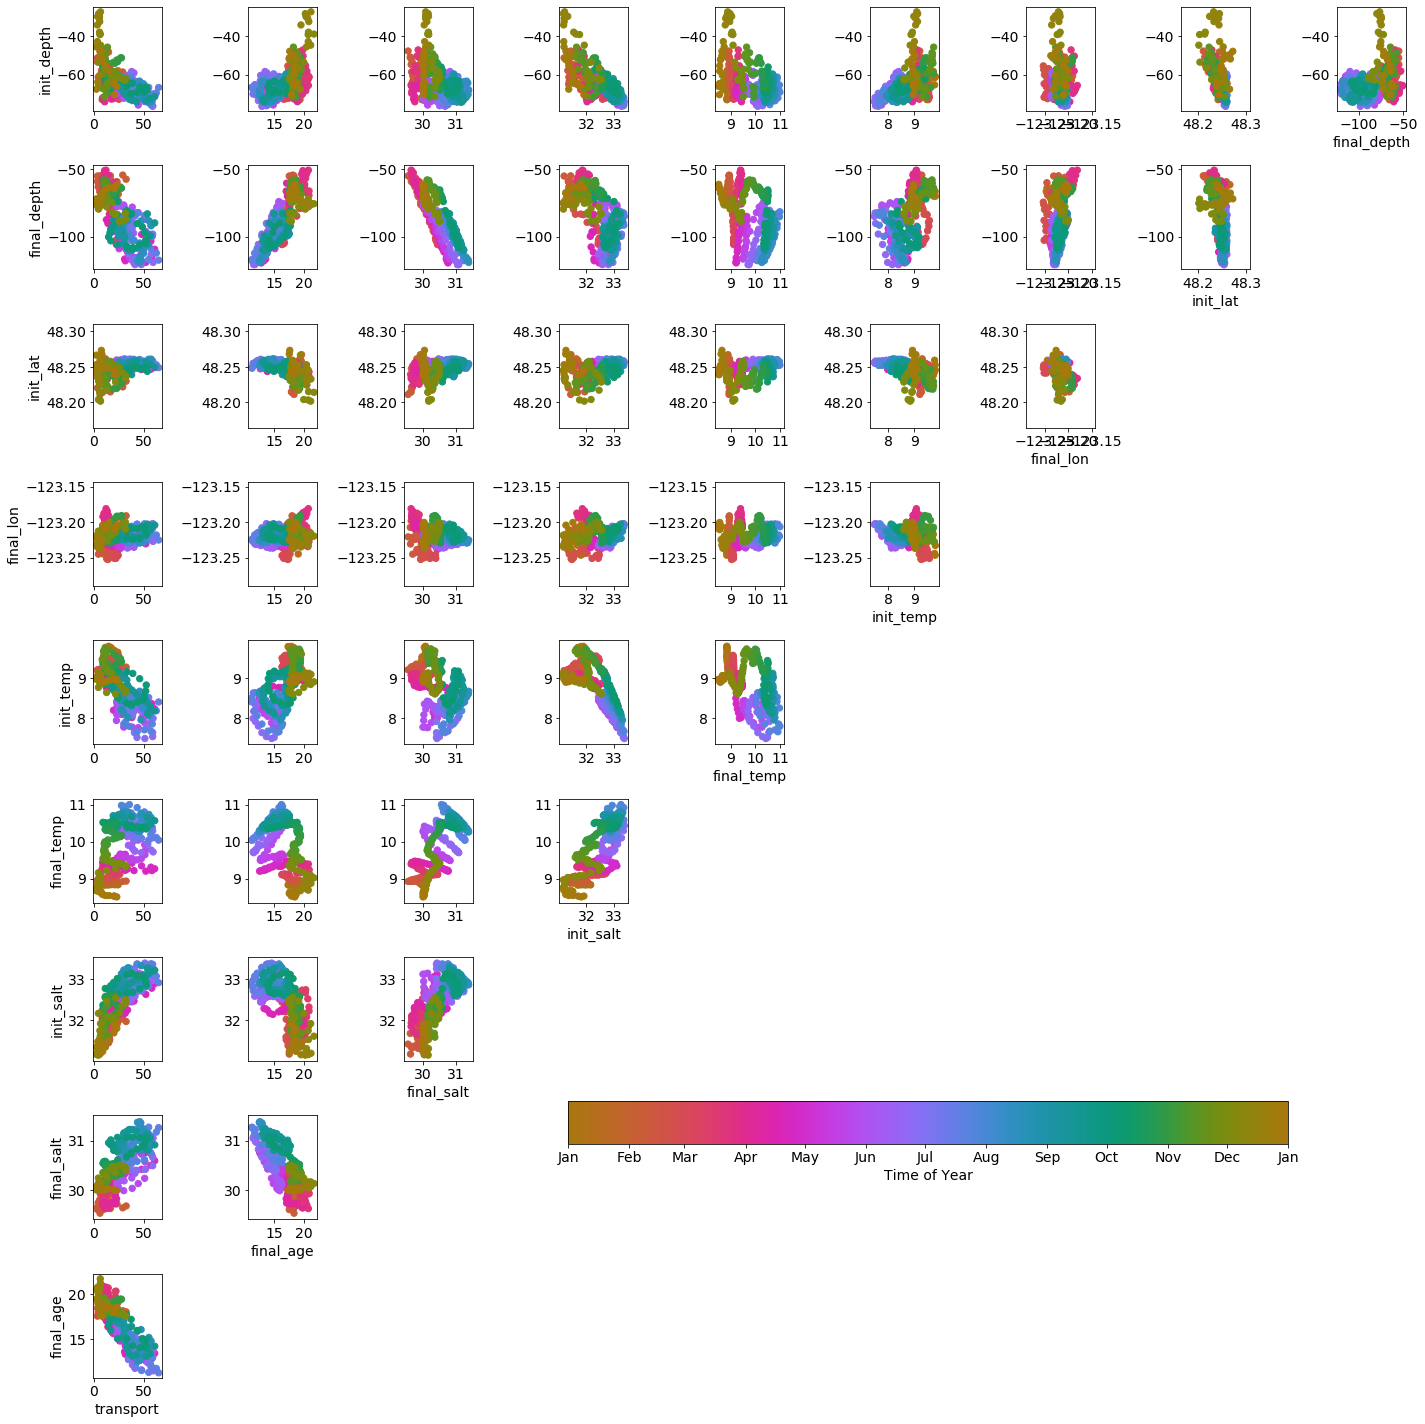

In [17]:
gobig(10, Vic_to_SoG_2015, ['transport', 'final_age', 
                           'final_salt', 'init_salt', 
                           'final_temp', 'init_temp',
                           'final_lon', 'init_lat',
                           'final_depth', 'init_depth' ])